In [5]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.optim import Adam
from torchsummary import summary
from torchvision import models
from tqdm import tqdm

from mlfocus import util
from mlfocus.loader import MIPData, MyFFTData, get_loaders
from mlfocus.model import ResnetModel
from mlfocus.train import train_step, validate

# try:
#     wandb
# except NameError:
#     import wandb
        
#     os.environ['WANDB_NOTEBOOK_NAME'] = 'fft_train.ipynb'
#     wandb.init(project="fft-mlfocus")
%load_ext autoreload
%autoreload 2
    

loading fft: 100%|██████████| 4434/4434 [00:00<00:00, 5204.52it/s]


data shape (2, 32, 32) float32
label shape torch.Size([1])
dataset length 4434


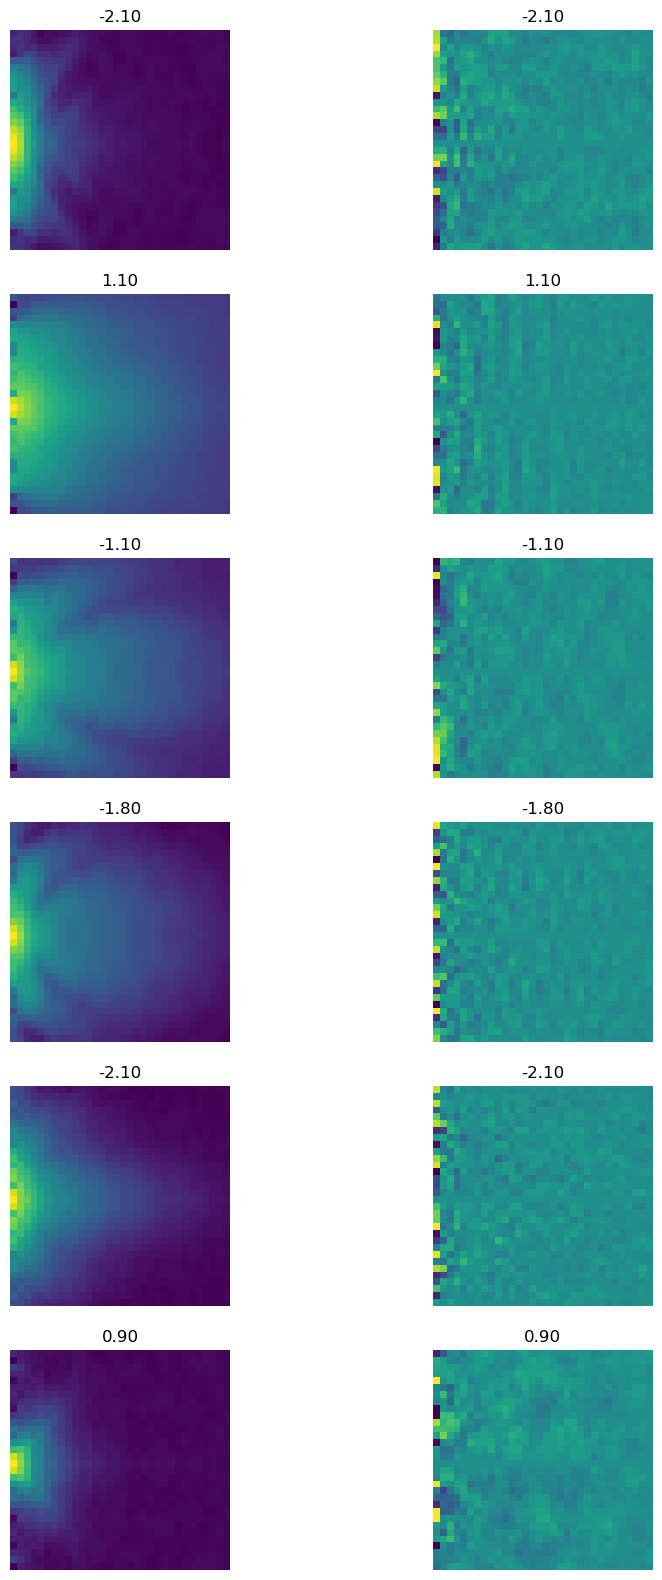

In [13]:
full_dset = MyFFTData("../mlfocus_data/")
util.preview_data(full_dset, n=6, figsize=(10, 30))


In [3]:
model = ResnetModel()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
batch_size = 1024
test_split = 0.1
learning_rate = 2e-3
epochs = 300

train_dataset = MyFFTData("../mlfocus_data/", exclude=["mt"])
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=4,
    pin_memory=True,
)
mt_data = MyFFTData("../mlfocus_data/", include=["mt"])
mt_loader = DataLoader(mt_data, batch_size=batch_size, shuffle=True)
all_loader = DataLoader(full_dset, batch_size=batch_size, shuffle=True)

optimizer = Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

wandb.config = {
    "learning_rate": 2e-3,
    "epochs": epochs,
    "batch_size": batch_size,
    "test_split": test_split,
}
wandb.watch(model)


[]

In [5]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    train_step(
        train_loader,
        model=model,
        optimizer=optimizer,
        loss=criterion,
        epoch_idx=e,
        device=device,
    )
    tot_val = validate(model, all_loader, criterion)
    mt_val = validate(model, mt_loader, criterion)
    wandb.log({"tot_val_loss": tot_val, "mt_val_loss": mt_val, "epoch": e})
    
    # print("\nValidate: Average loss: {:.4f}\n".format(val_loss))
torch.save(model, 'models/fft_model.pt')

Epoch: 299 [0/2598]	Loss: 0.005519: 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]


In [4]:
model

NameError: name 'model' is not defined